In [20]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
def load_dataset():
    X = np.loadtxt("logisticX.csv", delimiter=',')
    y = np.loadtxt("logisticY.csv")
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X, y


In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [23]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [24]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history


In [25]:
def plot_cost_vs_iteration(cost_history_01, cost_history_5):
    plt.plot(range(len(cost_history_01)), cost_history_01, color='blue', label='Learning Rate 0.1')
    plt.plot(range(len(cost_history_5)), cost_history_5, color='red', label='Learning Rate 5')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function Value')
    plt.title('Cost Function vs Iteration')
    plt.legend()
    plt.show()


In [26]:
X, y = load_dataset()
X = np.hstack((np.ones((len(y), 1)), X))
theta = np.zeros(X.shape[1])

In [27]:
learning_rate_01 = 0.1
learning_rate_5 = 5
iterations = 100

theta_01, cost_history_01 = gradient_descent(X, y, theta, learning_rate_01, iterations)
theta_5, cost_history_5 = gradient_descent(X, y, theta, learning_rate_5, iterations)




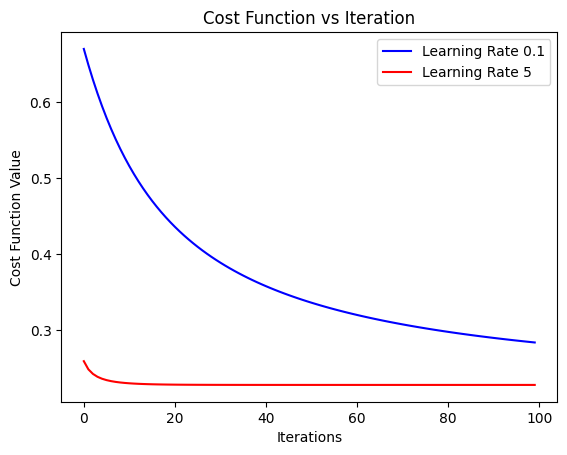

In [29]:

plot_cost_vs_iteration(cost_history_01, cost_history_5)

In [30]:
def plot_decision_boundary(X, y, theta):
    x_values = [np.min(X[:,1] - 2), np.max(X[:,2] + 2)]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')



In [31]:
def plot_cost_vs_iteration(cost_history):
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function Value')
    plt.title('Cost Function vs Iteration')
    plt.show()

In [32]:
def plot_dataset_with_decision_boundary(X, y, theta):
    plt.scatter(X[:,1][y == 1], X[:,2][y == 1], color='red', label='Class 1')
    plt.scatter(X[:,1][y == 0], X[:,2][y == 0], color='blue', label='Class 0')
    plot_decision_boundary(X, y, theta)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Dataset with Decision Boundary')
    plt.legend()
    plt.show()


In [33]:
def confusion_matrix(X, y, theta):
    predicted_probabilities = sigmoid(np.dot(X, theta))
    predicted_labels = (predicted_probabilities >= 0.5).astype(int)
    tp = np.sum((predicted_labels == 1) & (y == 1))
    fp = np.sum((predicted_labels == 1) & (y == 0))
    tn = np.sum((predicted_labels == 0) & (y == 0))
    fn = np.sum((predicted_labels == 0) & (y == 1))
    return np.array([[tp, fp], [fn, tn]])


In [34]:
def calculate_metrics(confusion_matrix):
    tp, fp, fn, tn = confusion_matrix.flatten()
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score


In [35]:
X, y = load_dataset()
X = np.hstack((np.ones((len(y), 1)), X))
theta = np.zeros(X.shape[1])

In [36]:
learning_rate = 0.1
iterations = 100
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

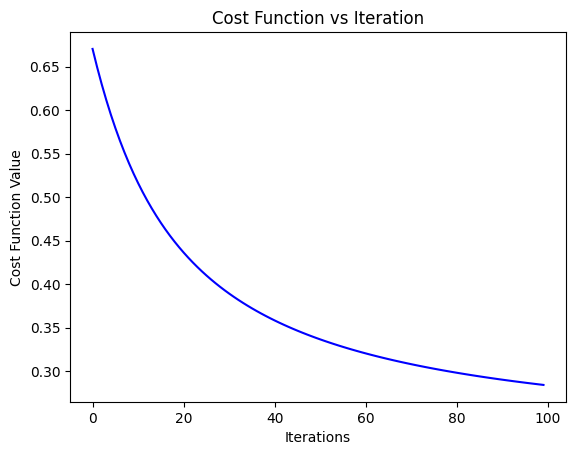

In [37]:
plot_cost_vs_iteration(cost_history)

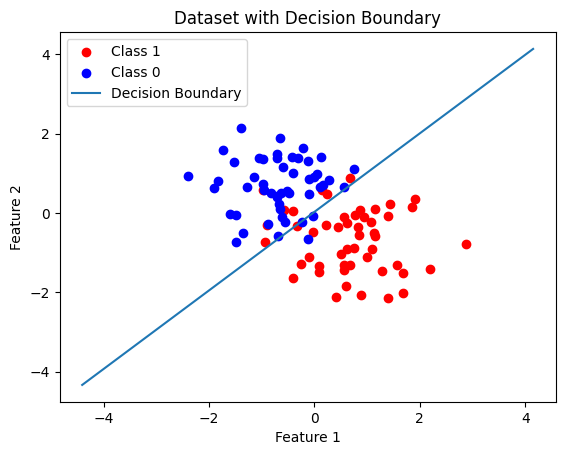

In [38]:
plot_dataset_with_decision_boundary(X, y, theta)

In [39]:
cost_after_convergence = cost_history[-1]
learned_parameters_after_convergence = theta
print("Cost Function Value after Convergence:", cost_after_convergence)
print("Learning Parameter Values after Convergence:", learned_parameters_after_convergence)

Cost Function Value after Convergence: 0.28419265029774515
Learning Parameter Values after Convergence: [ 0.03829679  1.24423217 -1.25698739]


In [40]:
conf_matrix = confusion_matrix(X, y, theta)
accuracy, precision, recall, f1_score = calculate_metrics(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
[[42  3]
 [ 8 47]]
Accuracy: 0.89
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894
